In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy

 
sns.set()


In [9]:
#from google.colab import files 
#uploaded=files.upload() 
df=pd.read_csv('heart.csv') 
#dataset=df.values 


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape


(303, 14)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
df= df.dropna(axis='rows')

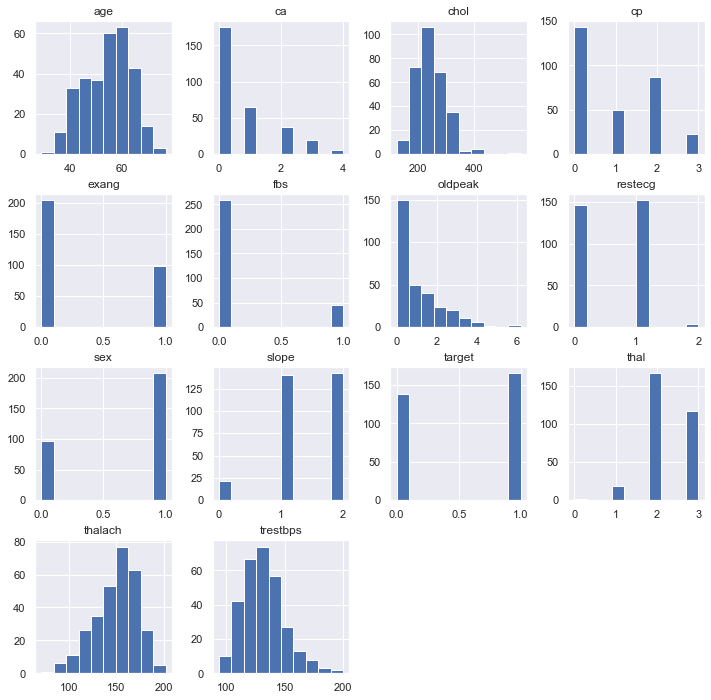

In [15]:
p = df.hist(figsize = (12,12))

In [16]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [17]:
#df['Cycle length(days)'] = df['Cycle length(days)'].fillna(df['Cycle length(days)'].mean())


In [18]:
for i in range(14):
    print(df.columns[i])


age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


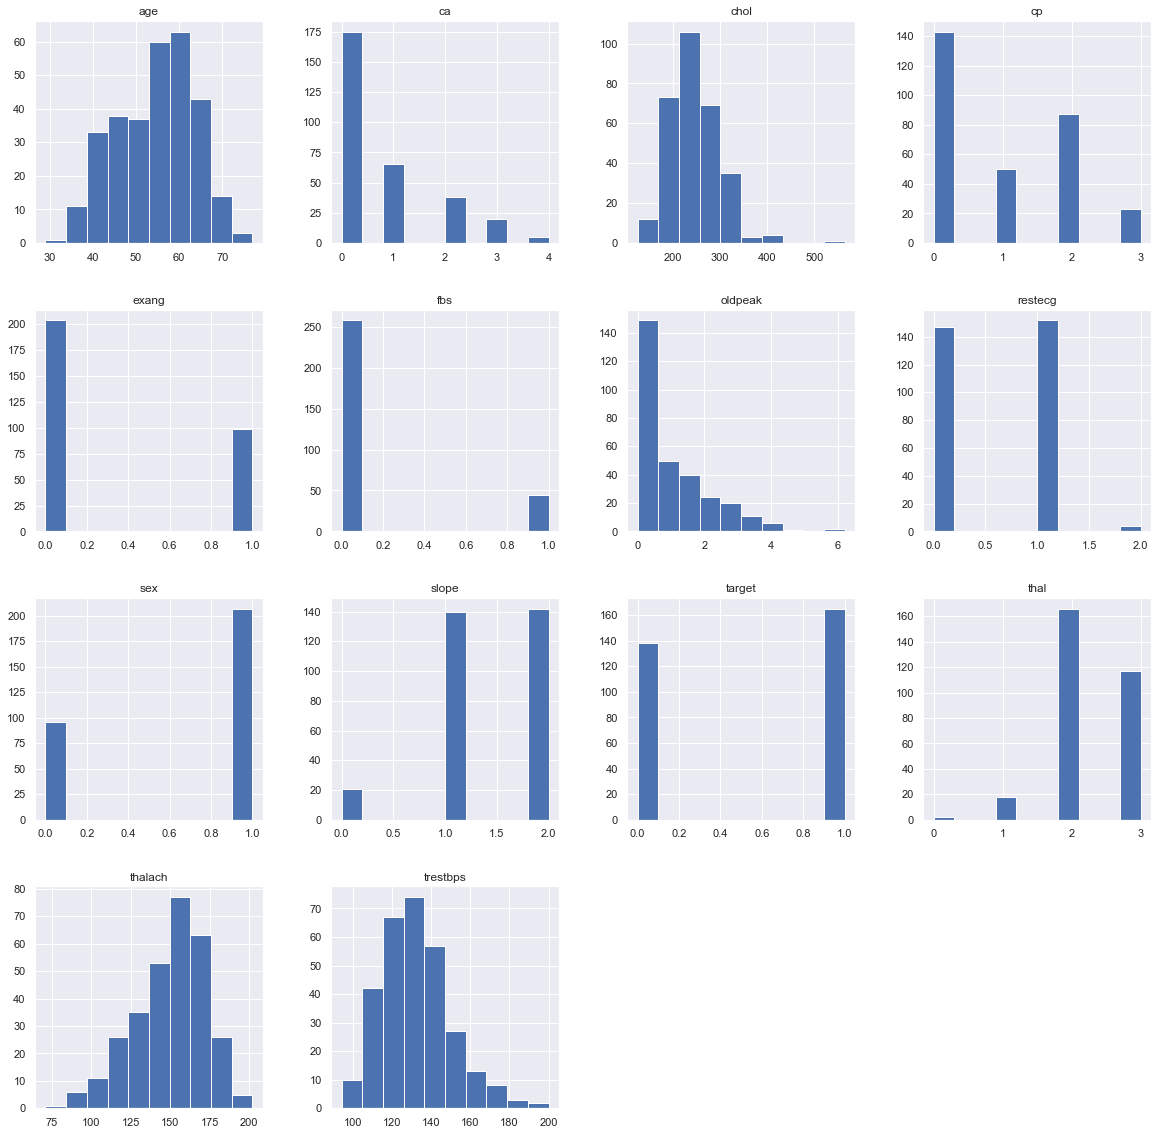

In [19]:
p = df.hist(figsize = (20,20))

In [20]:
#sns.pairplot(data =df)
plt.show()

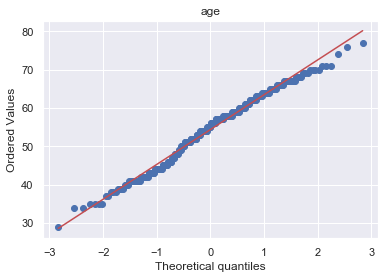

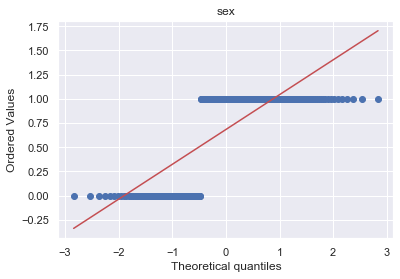

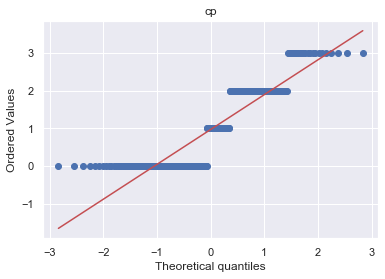

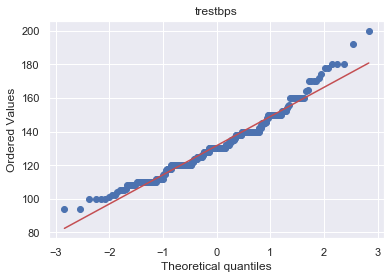

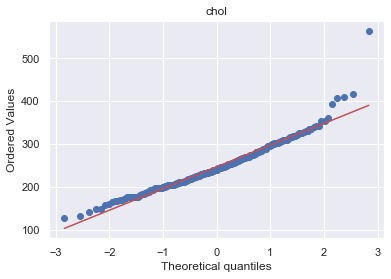

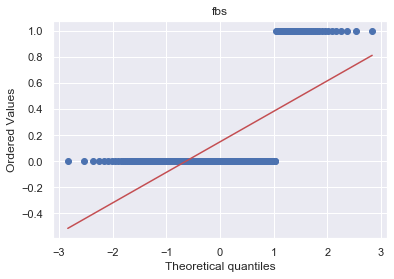

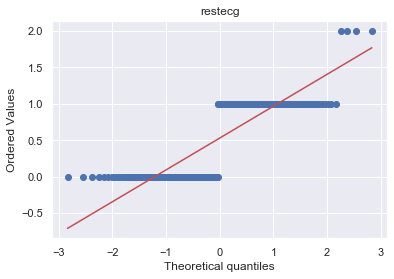

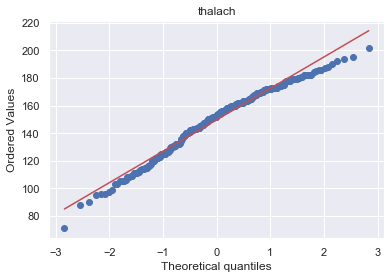

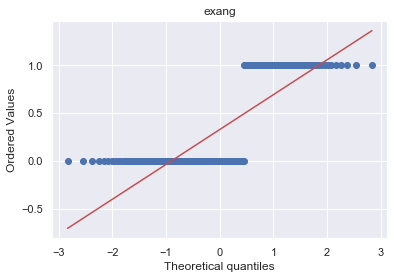

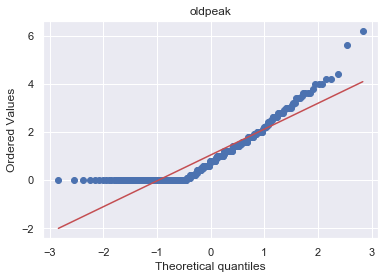

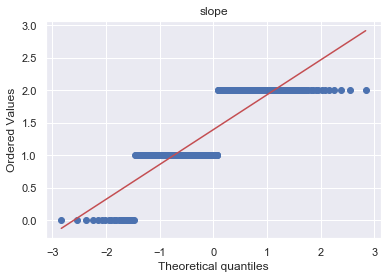

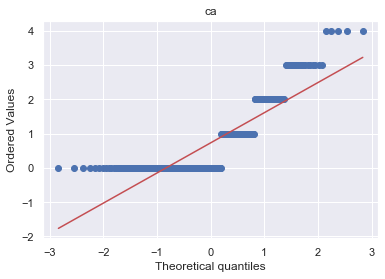

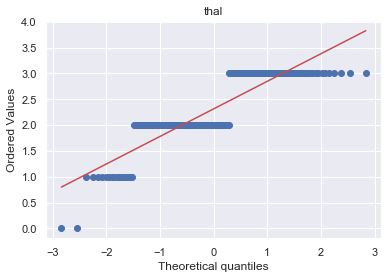

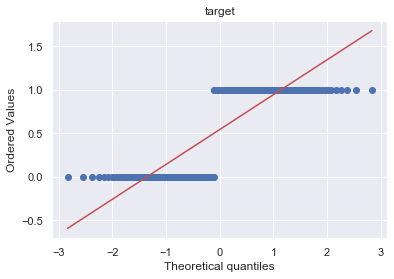

In [21]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [22]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = df.iloc[:,1 :-1]
y = df.iloc[:, 0]


In [24]:
X.head()


,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()


0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [27]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(df) 
scaled_data=scaler.transform(df) 
scaled_data 

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [28]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=13) 

pca.fit(scaled_data) 
x_pca=pca.transform(scaled_data) 


In [29]:
scaled_data.shape 

(303, 14)

In [30]:
x_pca.shape 

(303, 13)

In [31]:
from sklearn.model_selection import train_test_split 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 0) 

In [32]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [33]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [34]:
def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

In [35]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")


In [36]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [37]:
def logistic_regression (X_train,X_test,y_train,y_test):

  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(random_state = 0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  
  return print(f"Train score : {model.score(X_train, y_train)}\nTest score : {model.score(X_test, y_test)}")

In [38]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)
    
    print("-"*100)
    print()

    print("logistic Regression:\n")
    logistic_regression(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

In [39]:
print_score(X_train, X_test, y_train, y_test)


SVM:

Train score : 0.9834710743801653
Test score : 0.9508196721311475
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.9049586776859504
Test score : 0.9180327868852459
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.9132231404958677
Test score : 0.9508196721311475
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.9344262295081968
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.9672131147540983
----------------------------------------------------------------------------------------------------

logistic Regression:

Train score : 0.9710743801652892
Test score : 0.9508196721311475
--------------------------------------------------------

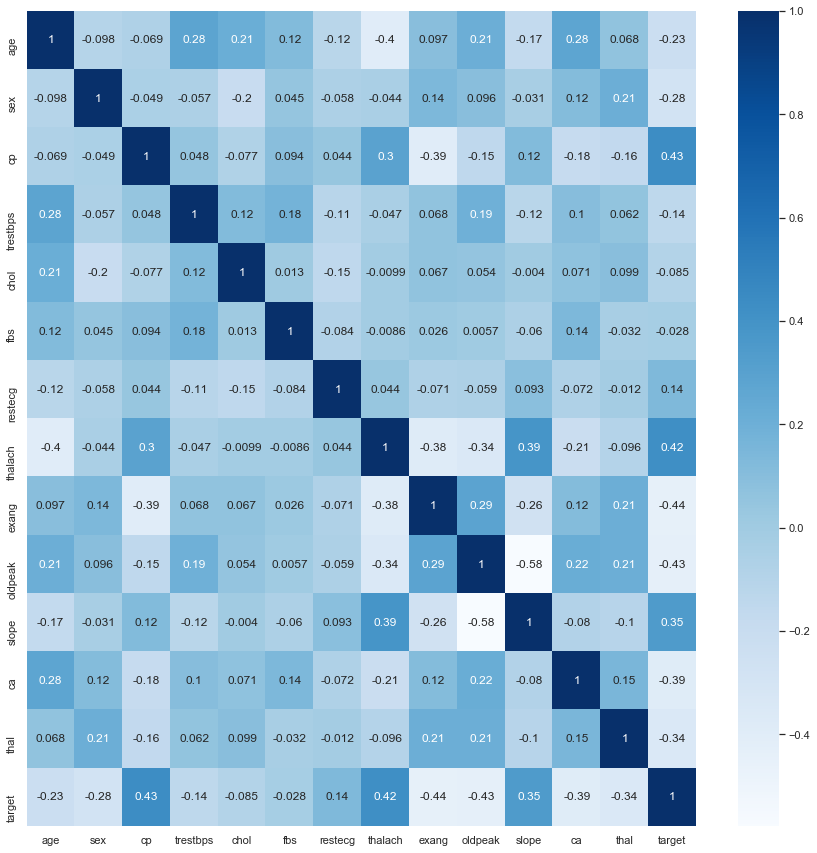

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show() 

In [41]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm
print(cm)


[[26  1]
 [ 1 33]]


In [42]:
from sklearn.metrics import confusion_matrix
classifier_forest = GaussianNB()
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[26  1]
 [ 2 32]]


In [43]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,26,1,27
1,2,32,34
All,28,33,61


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.97      0.94      0.96        34

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [45]:
filename = 'heart.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))  

In [46]:

#model = open('heart.pkl','rb')
#forest = pickle.load(model) 

In [47]:
#y_pred = forest.predict(X_test) 

In [48]:
#confusion_matrix(y_test, y_pred) 